In [ ]:
from sklearn import preprocessing, metrics, tree, ensemble
from sklearn.preprocessing import LabelEncoder, StandardScaler,MaxAbsScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.pipeline import make_pipeline
#-----------------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,StratifiedKFold,cross_validate
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from keras.preprocessing.text import Tokenizer
import csv
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer,TfidfVectorizer
#-----------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
#-----------------------------------------------------------
# Prevent future/deprecation warnings from showing in output
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
seed = 300

In [ ]:
# Reading our dataset
df = pd.read_excel('/dataset path', usecols=['tweet', 'sentiment'])

df.sentiment= df.sentiment.map({'positive':1, 'negative':-1, 'neutral':0})

X = df.tweet
y = df.sentiment

# Split our dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [ ]:
#Reading stop words

def get_stopwords_list(stop_file_path):    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(frozenset(stop_set))

stopwords_path = "/stop_words_arabic.txt"
stopwords = get_stopwords_list(stopwords_path)

#----------------------------------------------------------------------

#Remove stop words

def remove_stop_words(corpus):
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stopwords:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
        
    return results

In [ ]:
X_train = remove_stop_words(X_train)

In [ ]:
# Instantiate the CountVectorizer method
tfidf = TfidfVectorizer()

# Fit the training data and then return the matrix
training_data = tfidf.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf.transform(X_test)

In [ ]:
svm = SVC()

# Fit our model to the training data
svm.fit(training_data, y_train)

# Predict on the test data
predictions = svm.predict(testing_data)

svm_report = classification_report(y_test, predictions)


In [ ]:
conf_svm = confusion_matrix(y_test, predictions)
print("Confusion Matrix: svm")
print(conf_svm)
print("\nClassification Report: ",)
print (svm_report)
print("Accuracy on test set: {:.4f}".format(svm.score(testing_data, y_test)))
print("f1: {:.4f}".format(f1_score(y_test, predictions,average='weighted')))
print("precision_score: {:.4f}".format(precision_score(y_test, predictions,average='weighted')))
print("recall_score: {:.4f}".format(recall_score(y_test, predictions,average='weighted')))

print("----------------------------------------------------------------------")

Confusion Matrix: svm
[[5765  226   27]
 [1093 2747   45]
 [ 379  208  476]]

Classification Report: 
              precision    recall  f1-score   support

          -1       0.80      0.96      0.87      6018
           0       0.86      0.71      0.78      3885
           1       0.87      0.45      0.59      1063

    accuracy                           0.82     10966
   macro avg       0.84      0.70      0.75     10966
weighted avg       0.83      0.82      0.81     10966

Accuracy on test set: 0.8196
f1: 0.8101
precision_score: 0.8273
recall_score: 0.8196
----------------------------------------------------------------------


Text(0.5, 1.0, 'Support Vector Machines')

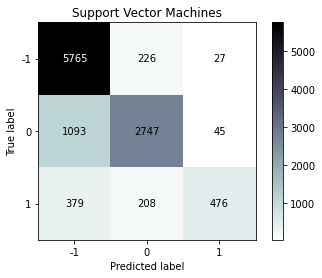

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions,cmap='bone_r') 
plt.title('Support Vector Machines')

In [ ]:
class_labels = ['negative', 'neutral', 'positive']
ConfusionMatrixDisplay.from_predictions(y_test, predictions,cmap='bone_r',display_labels = class_labels) #,normalize='true'
plt.title('Support Vector Machines')

Text(0.5, 1.0, 'Support Vector Machines')

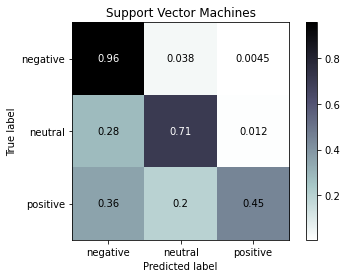

In [ ]:
class_labels = ['negative', 'neutral', 'positive']
ConfusionMatrixDisplay.from_predictions(y_test, predictions,cmap='bone_r',display_labels = class_labels, normalize='true') #,normalize='true'
plt.title('Support Vector Machines')

Cross Validation

In [ ]:
skf = StratifiedKFold(n_splits=10)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score,average='weighted'),
    'f1': make_scorer(f1_score,average='weighted'),
    'precision': make_scorer(precision_score,average='weighted'),
}

cv=skf

In [ ]:

scores = cross_validate(svm, training_data,y_train, cv=cv,
                         scoring=scoring,
                        return_train_score=False)
sorted(scores.keys())

print('accuracy',scores['test_accuracy'].mean())
print('f1',scores['test_f1'].mean())
print('precision',scores['test_precision'].mean())
print('recall',scores['test_sensitivity'].mean())

accuracy 0.8249281158702633
f1 0.8184518343493536
precision 0.8272292491294078
recall 0.8249281158702633


SMOTE, Oversampling

In [ ]:
sm = SMOTE(random_state=seed)
X_train_res, y_train_res = sm.fit_resample(training_data, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res))

Resampled dataset shape Counter({-1: 23683, 0: 23683, 1: 23683})


In [ ]:
svm = SVC()

# Fit our model to the training data
svm.fit(X_train_res, y_train_res)

# Predict on the test data
predictions = svm.predict(testing_data)

svm_report = classification_report(y_test, predictions)

In [ ]:
conf_svm = confusion_matrix(y_test, predictions)
print("Confusion Matrix: svm")
print(conf_svm)
print("\nClassification Report: ",)
print (svm_report)
print("Accuracy on test set: {:.4f}".format(svm.score(testing_data, y_test)))
print("f1: {:.4f}".format(f1_score(y_test, predictions,average='weighted')))
print("precision_score: {:.4f}".format(precision_score(y_test, predictions,average='weighted')))
print("recall_score: {:.4f}".format(recall_score(y_test, predictions,average='weighted')))

print("----------------------------------------------------------------------")

Confusion Matrix: svm
[[5762  227   29]
 [1089 2745   51]
 [ 378  178  507]]

Classification Report: 
              precision    recall  f1-score   support

          -1       0.80      0.96      0.87      6018
           0       0.87      0.71      0.78      3885
           1       0.86      0.48      0.61      1063

    accuracy                           0.82     10966
   macro avg       0.84      0.71      0.75     10966
weighted avg       0.83      0.82      0.81     10966

Accuracy on test set: 0.8220
f1: 0.8135
precision_score: 0.8299
recall_score: 0.8220
----------------------------------------------------------------------


Text(0.5, 1.0, 'Support Vector Machines')

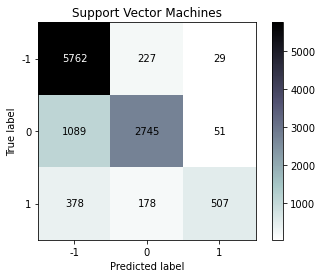

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions,cmap='bone_r') 
plt.title('Support Vector Machines')

In [ ]:
svm = SVC()
scores = cross_validate(svm, X_train_res, y_train_res, cv=cv,
                         scoring=scoring,
                        return_train_score=False)
sorted(scores.keys())

print('accuracy',scores['test_accuracy'].mean())
print('f1',scores['test_f1'].mean())
print('precision',scores['test_precision'].mean())
print('recall',scores['test_sensitivity'].mean())

accuracy 0.9059812077207399
f1 0.9063638024918863
precision 0.9166248269736347
recall 0.9059812077207399
